In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [84]:
df = pd.read_csv("File 1.csv")

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [88]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [89]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [90]:
X = df.drop(columns=['label'])
y = df['label']  

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
pca = PCA(n_components=5)  # Reduce to 5 important components
X_pca = pca.fit_transform(X_scaled)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [96]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

In [97]:
param_grid = {
    'C': [0.1, 1, 10], 
    'penalty': ['l1', 'l2'] 
}

In [98]:
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [99]:
best_model = grid_search.best_estimator_

In [100]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       1.00      0.83      0.90        23
           9       0.95      0.95      0.95        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       0.95    

In [120]:
print(f"Logistic Accuracy: {accuracy:.2f}")

Logistic Accuracy: 0.97


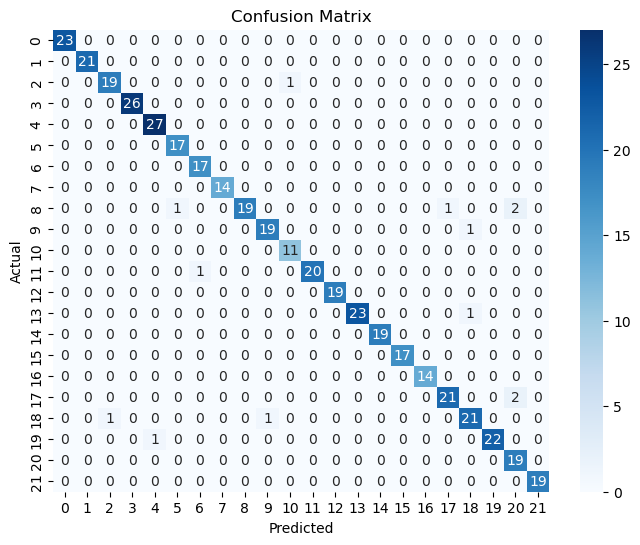

In [118]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

C:\Users\roqay\AppData\Local\Temp\ipykernel_10660\1341660236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f"PC{i+1}" for i in range(5)], y=pca.explained_variance_ratio_, palette="coolwarm")


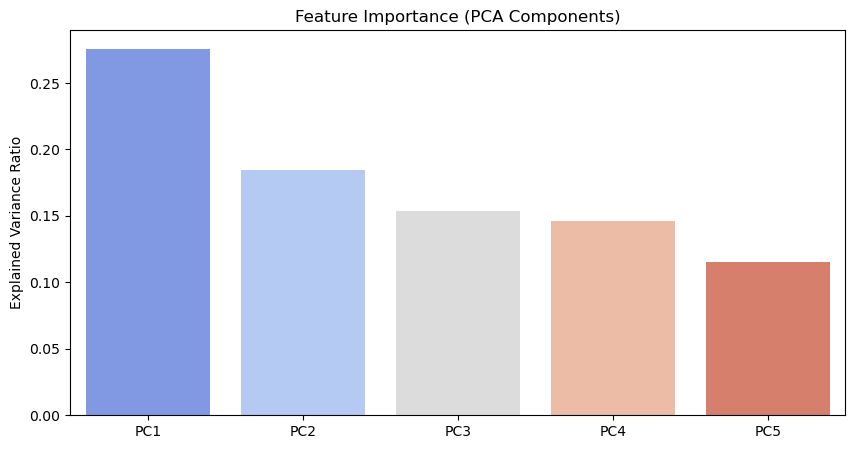

In [102]:
plt.figure(figsize=(10,5))
sns.barplot(x=[f"PC{i+1}" for i in range(5)], y=pca.explained_variance_ratio_, palette="coolwarm")
plt.title("Feature Importance (PCA Components)")
plt.ylabel("Explained Variance Ratio")
plt.show()